In [3]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [4]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = dataset.target
#df_iris['class'] = dataset.target_names[dataset.target]
# Show 10 random samples
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


# PCA Exercise
Taking in consideration the iris dataset, answer the following questions. **You may have to run some code first :)**
1. How many **principal components can we consider**?
2. How do you think is going to be the **cumulated percentage of explained variance** attending to the number of components? Calculate it.
3. Consider the necessary number of components to explain at least a **99% of the variance**. Give the equations to calculate these components.
4. Calculate the **new values** for this decomposition and plot them.
5. Repeat the steps 3 and 4 **taking a 95% of the variance**

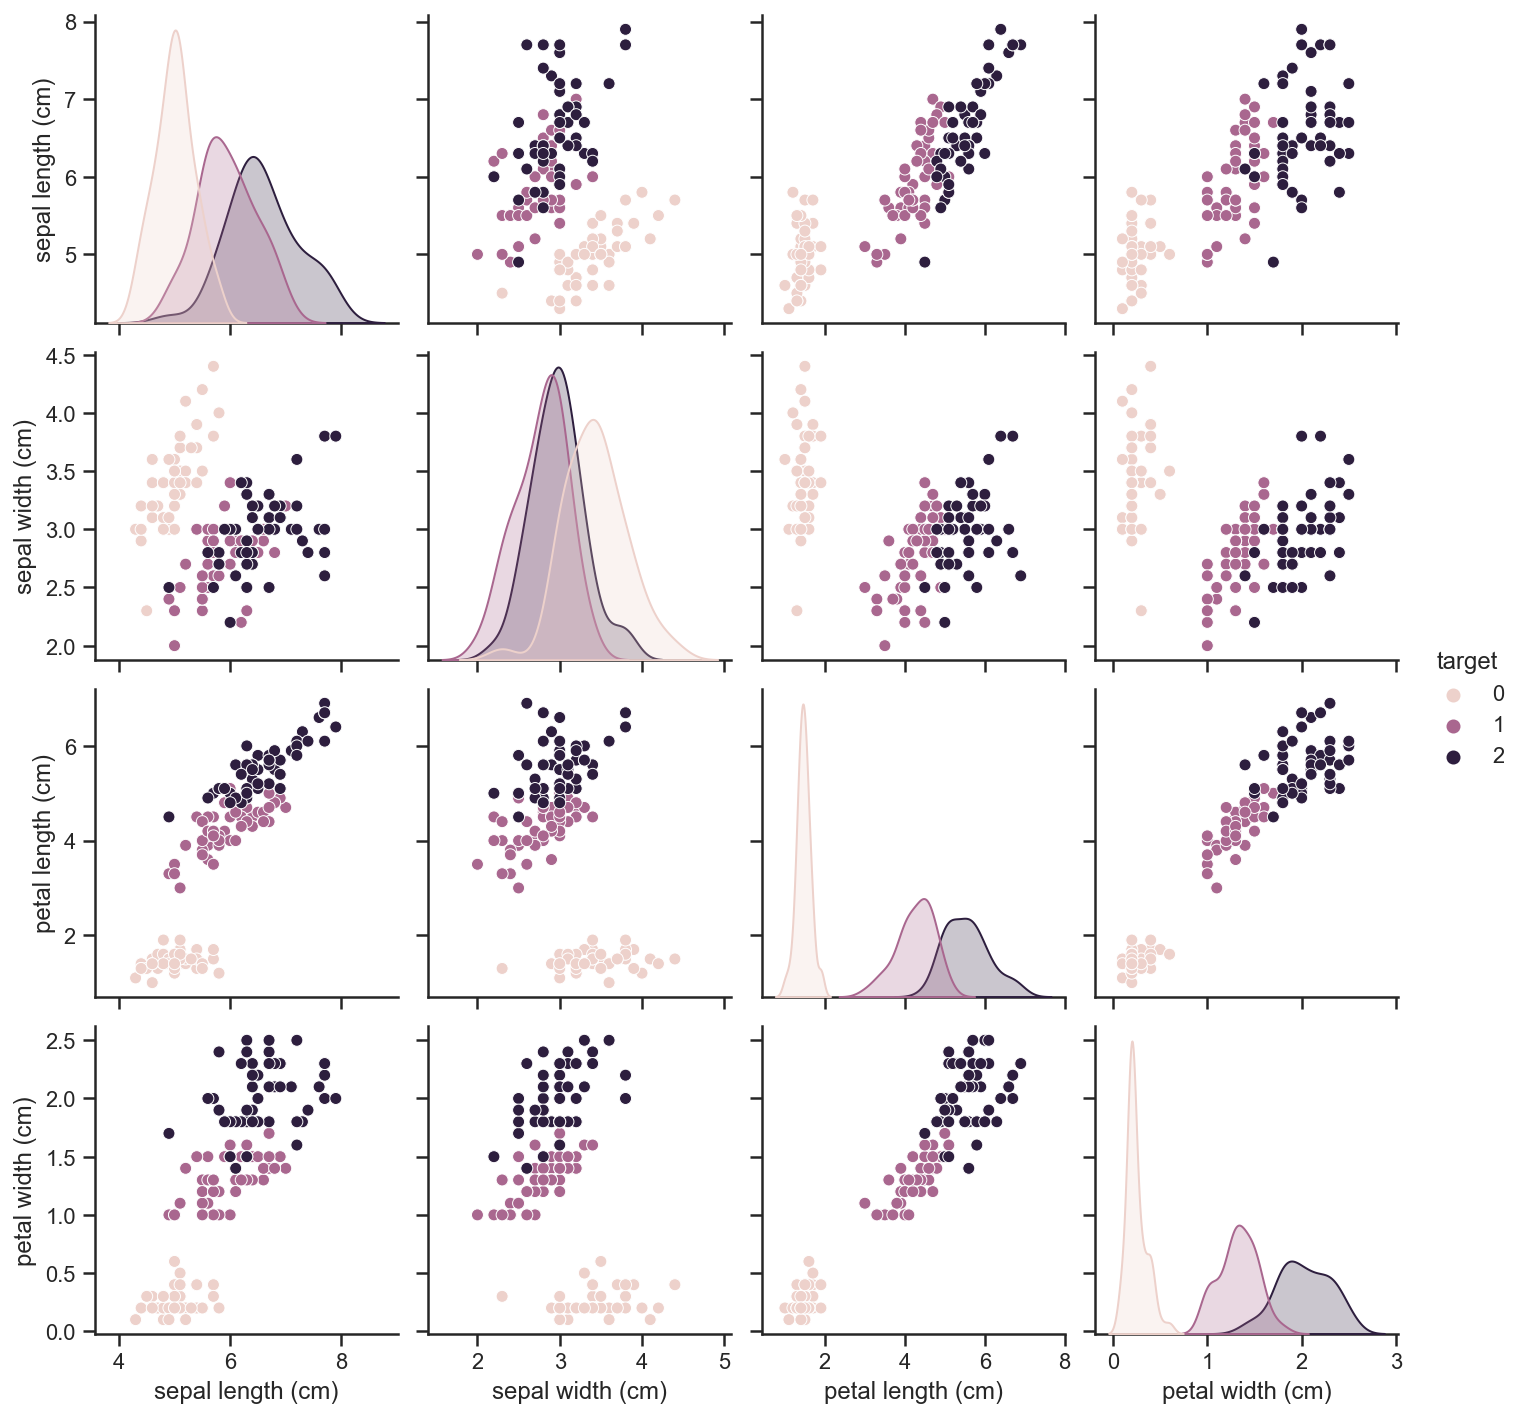

In [5]:
sns.set(style="ticks")
sns.pairplot(data = df_iris.loc[:,:"target"], hue = 'target')

In [6]:
# Run the PCA model here
from sklearn.decomposition import PCA
pca = PCA()
df_pca = df_iris.drop(['target'], axis=1,)
j=pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
j=pd.DataFrame(j)
# You should end up with a transformed dataframe
j.head()

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# check the variance in each component
print(y_variance)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [9]:
# compare it with the original dataframe and to what it corresponds (more or less)
print(pd.DataFrame(pca.components_, columns=df_pca.columns))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3          -0.315487          0.319723           0.479839         -0.753657


Text(0.5, 1.0, 'PCA')

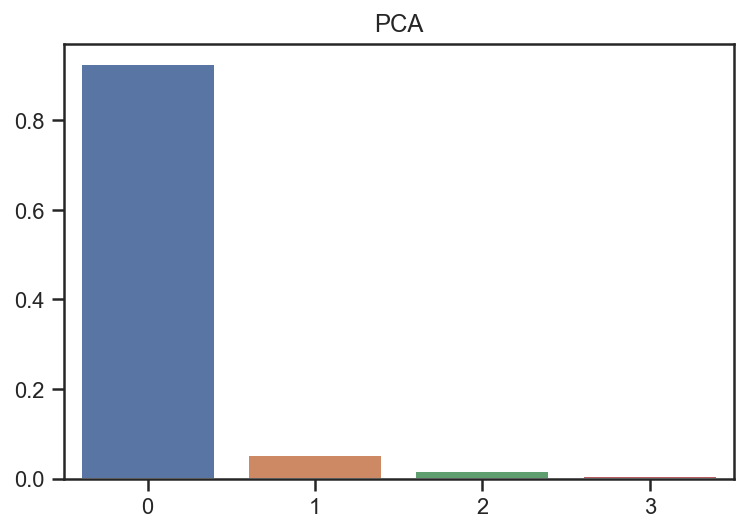

In [10]:
# plot it!
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")